[View in Colaboratory](https://colab.research.google.com/github/kmanicka/CarND-Traffic-Sign-Classifier-Project/blob/master/Udacity_Term_1_Traffic_Sign_Classifier.ipynb)

# **Self-Driving Car Engineer Nanodegree**

## Project: Build a Traffic Sign Recognition Classifier


### Download data and Unzip

In [29]:
#Download German Traffic Data Set

!rm *.p *.zip
!wget https://s3-us-west-1.amazonaws.com/udacity-selfdrivingcar/traffic-signs-data.zip
!unzip traffic-signs-data.zip
!ls -lrt


rm: cannot remove '*.p': No such file or directory
rm: cannot remove '*.zip': No such file or directory
--2018-05-23 00:21:38--  https://s3-us-west-1.amazonaws.com/udacity-selfdrivingcar/traffic-signs-data.zip
Resolving s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)... 52.219.24.113
Connecting to s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)|52.219.24.113|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 123524425 (118M) [application/zip]
Saving to: ‘traffic-signs-data.zip’

traffic-signs-data. 100%[===================>] 117.80M  19.5MB/s    in 11s     

2018-05-23 00:21:50 (11.0 MB/s) - ‘traffic-signs-data.zip’ saved [123524425/123524425]

Archive:  traffic-signs-data.zip
  inflating: test.p                  
  inflating: train.p                 
  inflating: valid.p                 
datalab  test.p  traffic-signs-data.zip  train.p  valid.p


### Load and Prepare Data

In [30]:
import pickle
import numpy as np
from keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline


training_file   = 'train.p' 
validation_file = 'valid.p' 
testing_file    = 'test.p'

print('training file name = ', training_file)
print('validation file name = ', validation_file)
print('testing file name = ', testing_file)


#Load Data

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']


#Extract Constants

n_train = X_train.shape[0]
n_validation = X_valid.shape[0]
n_test = X_test.shape[0]

image_shape = X_train[0].shape

n_classes = len(np.unique(y_test))

print("Shape of X_train =", X_train.shape)
print("Shape of X_test =", X_test.shape)
print("Shape of X_valid =", X_valid.shape)

print("Shape of Y_train =", y_train.shape)
print("Shape of Y_test =", y_test.shape)
print("Shape of Y_valid =", y_valid.shape)

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)


#Convert labels to one hot.
y_train_one_hot = to_categorical(y_train, n_classes)
y_valid_one_hot = to_categorical(y_valid, n_classes)
y_test_one_hot = to_categorical(y_test, n_classes)


print("Shape of y_train_one_hot =", y_train_one_hot.shape)
print("Shape of y_valid_one_hot =", y_valid_one_hot.shape)
print("Shape of y_test_one_hot =", y_test_one_hot.shape)


training file name =  train.p
validation file name =  valid.p
testing file name =  test.p
Shape of X_train = (34799, 32, 32, 3)
Shape of X_test = (12630, 32, 32, 3)
Shape of X_valid = (4410, 32, 32, 3)
Shape of Y_train = (34799,)
Shape of Y_test = (12630,)
Shape of Y_valid = (4410,)
Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43
Shape of y_train_one_hot = (34799, 43)
Shape of y_valid_one_hot = (4410, 43)
Shape of y_test_one_hot = (12630, 43)


### Analyze Data

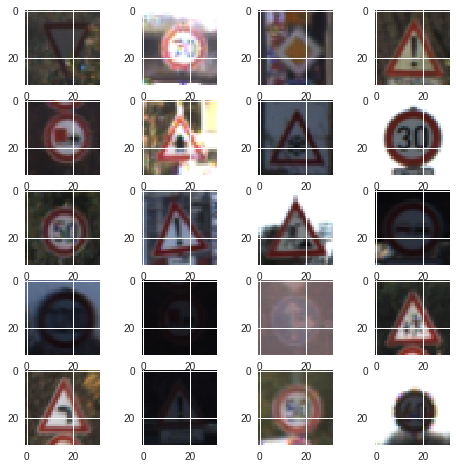

In [32]:
# view random samples 

fig=plt.figure(figsize=(8, 8))
columns,rows = 4,5
for i in range(1,columns*rows + 1):
  fig.add_subplot(rows, columns, i)
  plt.imshow(X_train[np.random.randint(n_train)])

(array([2640., 1680., 2250., 1350.,  900.,  930.,  480.,  690.,  690.,
        1020.]),
 array([ 0. ,  4.2,  8.4, 12.6, 16.8, 21. , 25.2, 29.4, 33.6, 37.8, 42. ]),
 <a list of 10 Patch objects>)

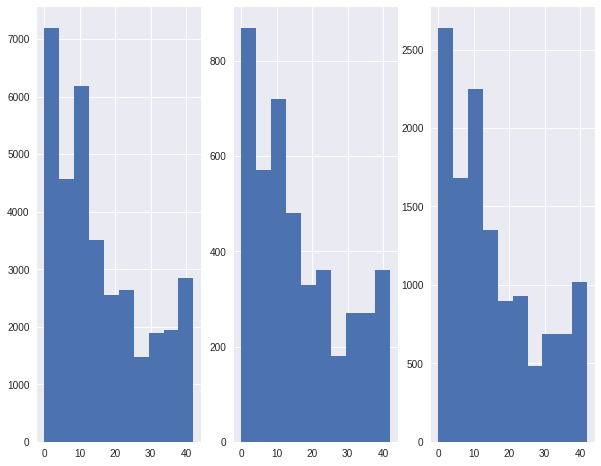

In [33]:
#Analyze distribution of the Images per class


fig=plt.figure(figsize=(10, 8))
columns,rows = 3,1
fig.add_subplot(rows, columns, 1)
plt.hist(y_train)
fig.add_subplot(rows, columns, 2)
plt.hist(y_valid)
fig.add_subplot(rows, columns, 3)
plt.hist(y_test)

### Build, Train and Evaluate Model 


#####################################################################
 Model Summary
#####################################################################
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 28, 28, 32)        2432      
_________________________________________________________________
activation_21 (Activation)   (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 10, 10, 64)        51264     
_________________________________________________________________
activation_22 (Activation)   (None, 10, 10, 64)        0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 5, 5, 64)       

34799/34799 [==============================] - 4s 110us/step - loss: 10.1631 - acc: 0.0695 - val_loss: 2.8456 - val_acc: 0.3120
Epoch 2/20
34799/34799 [==============================] - 3s 94us/step - loss: 2.0364 - acc: 0.4677 - val_loss: 0.9274 - val_acc: 0.7664
Epoch 3/20
34799/34799 [==============================] - 3s 94us/step - loss: 0.8746 - acc: 0.7525 - val_loss: 0.4705 - val_acc: 0.8728
Epoch 4/20
34799/34799 [==============================] - 3s 94us/step - loss: 0.4837 - acc: 0.8636 - val_loss: 0.3332 - val_acc: 0.8984
Epoch 5/20
34799/34799 [==============================] - 3s 93us/step - loss: 0.3468 - acc: 0.9029 - val_loss: 0.2466 - val_acc: 0.9283
Epoch 6/20
14592/34799 [===========>..................] - ETA: 1s - loss: 0.2872 - acc: 0.9190

34799/34799 [==============================] - 3s 93us/step - loss: 0.2621 - acc: 0.9274 - val_loss: 0.2209 - val_acc: 0.9365
Epoch 7/20
34799/34799 [==============================] - 3s 94us/step - loss: 0.2113 - acc: 0.9427 - val_loss: 0.2444 - val_acc: 0.9272
Epoch 8/20
34799/34799 [==============================] - 3s 94us/step - loss: 0.1615 - acc: 0.9551 - val_loss: 0.1766 - val_acc: 0.9537
Epoch 9/20
34799/34799 [==============================] - 3s 93us/step - loss: 0.1546 - acc: 0.9565 - val_loss: 0.2096 - val_acc: 0.9474
Epoch 10/20
34799/34799 [==============================] - 3s 93us/step - loss: 0.1305 - acc: 0.9651 - val_loss: 0.1998 - val_acc: 0.9517
Epoch 11/20
16384/34799 [=============>................] - ETA: 1s - loss: 0.1199 - acc: 0.9683

34799/34799 [==============================] - 3s 93us/step - loss: 0.1206 - acc: 0.9687 - val_loss: 0.1566 - val_acc: 0.9590
Epoch 12/20
34799/34799 [==============================] - 3s 93us/step - loss: 0.1098 - acc: 0.9704 - val_loss: 0.1789 - val_acc: 0.9556
Epoch 13/20
34799/34799 [==============================] - 3s 93us/step - loss: 0.1062 - acc: 0.9721 - val_loss: 0.1552 - val_acc: 0.9626
Epoch 14/20
34799/34799 [==============================] - 3s 95us/step - loss: 0.0886 - acc: 0.9760 - val_loss: 0.2104 - val_acc: 0.9617
Epoch 15/20
34799/34799 [==============================] - 3s 94us/step - loss: 0.0781 - acc: 0.9792 - val_loss: 0.2345 - val_acc: 0.9501
Epoch 16/20
12800/34799 [==========>...................] - ETA: 2s - loss: 0.0883 - acc: 0.9774

34799/34799 [==============================] - 3s 94us/step - loss: 0.0777 - acc: 0.9800 - val_loss: 0.1669 - val_acc: 0.9574
Epoch 17/20
34799/34799 [==============================] - 3s 93us/step - loss: 0.0719 - acc: 0.9819 - val_loss: 0.1798 - val_acc: 0.9653
Epoch 18/20
34799/34799 [==============================] - 3s 93us/step - loss: 0.0674 - acc: 0.9819 - val_loss: 0.1906 - val_acc: 0.9628
Epoch 19/20
34799/34799 [==============================] - 3s 93us/step - loss: 0.0662 - acc: 0.9833 - val_loss: 0.1751 - val_acc: 0.9590
Epoch 20/20
34799/34799 [==============================] - 3s 93us/step - loss: 0.0581 - acc: 0.9856 - val_loss: 0.1636 - val_acc: 0.9669

#####################################################################
 Training History
#####################################################################
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
[2.8455726197517377, 0.9274432970553028, 0.47046861207944735, 0.33323800834128103, 0.2465533291874559, 0.22089239

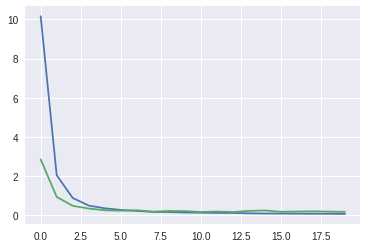


#####################################################################
 Evaluating Model
#####################################################################
12630/12630 [==============================] - 1s 107us/step

#####################################################################
Test loss: 0.2252804275757193
Test accuracy: 0.9567695961900864
#####################################################################


In [37]:
from keras.models import Sequential
from keras.layers import Input, Dense, Flatten, Dropout, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam, Adadelta


def LeNet(input_shape,classes, weights_path=None) :
  
  model = Sequential()

  #Layer 1 
  model.add(Conv2D(32, (5, 5), padding="valid",input_shape=input_shape))
  model.add(Activation("relu"))
  model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

  #Layer 2
  model.add(Conv2D(64, (5, 5), padding="valid"))
  model.add(Activation("relu"))
  model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
  model.add(Dropout(0.25))
  
  model.add(Flatten())
  
  #Layer 3
  model.add(Dense(800))
  model.add(Activation("relu"))
  model.add(Dropout(0.5))
  
  #Layer 4
  model.add(Dense(128))
  model.add(Activation("relu"))
  model.add(Dropout(0.5))

  #Layer 5
  model.add(Dense(classes))
  model.add(Activation("softmax"))

  
  return model

model = LeNet(image_shape,n_classes)

print()
print('#####################################################################')
print(' Model Summary')
print('#####################################################################')


model.summary()


model.compile(loss=categorical_crossentropy,
              optimizer=Adadelta(),
              metrics=['accuracy'])

print()
print('#####################################################################')
print(' Training Model')
print('#####################################################################')


#@title Training Parameters
batch_size = 256 #@param {type:"integer"}
epochs = 20 #@param {type:"integer"}

print('batch_size ' + str(batch_size))
print('epochs ' + str(epochs))

history = model.fit(X_train, y_train_one_hot,
                batch_size=batch_size,
                epochs=epochs,
                verbose=1,
                validation_data=(X_valid, y_valid_one_hot))


print()
print('#####################################################################')
print(' Training History')
print('#####################################################################')


print(history.history.keys())
print(history.history['val_loss'])


train_loss = history.history['loss']
val_loss   = history.history['val_loss']
train_acc  = history.history['acc']
val_acc    = history.history['val_acc']
xc         = range(epochs)

plt.figure()
plt.plot(xc, train_loss)
plt.plot(xc, val_loss)
plt.show()


print()
print('#####################################################################')
print(' Evaluating Model')
print('#####################################################################')


score = model.evaluate(X_test, y_test_one_hot, verbose=1)


print()
print('#####################################################################')
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print('#####################################################################')
